In [1]:
import pandas as pd
from pathlib import Path
import logging
import json

import matplotlib.pyplot as plt
import seaborn as sns

import re

In [2]:
path_generic = Path(r'C:\Users\siebert\PycharmProjects\interactive-time-series-analysis\review\search\dependencies_generic_packages_raw_results')
path_domain_specific = Path(r'C:\Users\siebert\PycharmProjects\interactive-time-series-analysis\review\search\dependencies_domain_specific_packages_raw_results')

In [3]:
def get_dependencies(path):
    dependencies = []
    for filename in path.glob('*.json'):
        with open(filename, 'r') as f:
            try:
                deps = json.load(f)
                dependencies.extend(deps)
            except json.JSONDecodeError:
                print(filename)
    return pd.DataFrame(dependencies)

In [4]:
dependencies_generic = get_dependencies(path_generic)
dependencies_domain_specific = get_dependencies(path_domain_specific)

C:\Users\siebert\PycharmProjects\interactive-time-series-analysis\review\search\dependencies_generic_packages_raw_results\deps-cesium.json
C:\Users\siebert\PycharmProjects\interactive-time-series-analysis\review\search\dependencies_generic_packages_raw_results\deps-deeptime.json
C:\Users\siebert\PycharmProjects\interactive-time-series-analysis\review\search\dependencies_domain_specific_packages_raw_results\deps-mne-python.json
C:\Users\siebert\PycharmProjects\interactive-time-series-analysis\review\search\dependencies_domain_specific_packages_raw_results\deps-nitime.json
C:\Users\siebert\PycharmProjects\interactive-time-series-analysis\review\search\dependencies_domain_specific_packages_raw_results\deps-pycbc.json
C:\Users\siebert\PycharmProjects\interactive-time-series-analysis\review\search\dependencies_domain_specific_packages_raw_results\deps-PyEMMA.json
C:\Users\siebert\PycharmProjects\interactive-time-series-analysis\review\search\dependencies_domain_specific_packages_raw_results

In [5]:
## manualy add dependencies 
deps_cesium = [
'numpy',
'scipy',
'scikit-learn',
'pandas',
'dask',
'toolz',
'gatspy',
'cloudpickle',
'joblib',
]

deps_deeptime = [
    'numpy', 'scipy', 'scikit-learn'
]

deps_nitime = [
    'numpy',
    'cython',
    'scipy',
    'matplotlib',
    'networkx',
    'nibabel',
]

deps_pycbc = [
'numpy',
'Mako',
'cython',
'decorator',
'numpy',
'scipy',
'matplotlib',
'pillow',
'h5py',
'jinja2',
'astropy',
'mpld3',
'lscsoft-glue',
'emcee',
'requests',
'beautifulsoup4',
'six',
'ligo-segments',
'tqdm',
'gwdatafind',
]

deps_pyemma = [
'bhmm',
'decorator',
'h5py',
'matplotlib',
'mdtraj',
'msmtools',
'numpy',
'pathos',
'psutil',
'pyyaml',
'scipy',
'tqdm',
]

deps_pyaudioanalysis = [
'matplotlib',
'simplejson',
'scipy',
'numpy',
'hmmlearn',
'eyeD3',
'pydub',
'scikit-learn',
'tqdm',
'plotly',
]

deps_mne = [
    'numpy',
'scipy',
'matplotlib',
'pyqt5',
'pyqt5-sip',
'sip',
'scikit-learn',
'nibabel',
'numba',
'h5py',
'pandas',
'numexpr',
'jupyter',
'python-picard',
'statsmodels',
'joblib',
'psutil',
'dipy',
'vtk',
'mayavi',
'PySurfer',
'nilearn',
'xlrd',
'imageio',
'imageio-ffmpeg',
'pyvista',
'pyvistaqt',
'tqdm',
'mffpy',
]

deps_talib=[
    'numpy'
]

In [6]:
dependencies_generic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   name                    40 non-null     object
 1   summary                 40 non-null     object
 2   specifier               40 non-null     object
 3   requires                40 non-null     object
 4   required_by             40 non-null     object
 5   import_names            40 non-null     object
 6   homepage                38 non-null     object
 7   extras_available        40 non-null     object
 8   extras_requested        40 non-null     object
 9   project_name            40 non-null     object
 10  license                 40 non-null     object
 11  versions_available      40 non-null     object
 12  version_installed       1 non-null      object
 13  version_latest          40 non-null     object
 14  version_latest_in_spec  40 non-null     object
 15  download

In [7]:
dependencies_domain_specific.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   name                    26 non-null     object
 1   summary                 26 non-null     object
 2   specifier               26 non-null     object
 3   requires                26 non-null     object
 4   required_by             26 non-null     object
 5   import_names            26 non-null     object
 6   homepage                26 non-null     object
 7   extras_available        26 non-null     object
 8   extras_requested        26 non-null     object
 9   project_name            26 non-null     object
 10  license                 26 non-null     object
 11  versions_available      26 non-null     object
 12  version_installed       0 non-null      object
 13  version_latest          26 non-null     object
 14  version_latest_in_spec  26 non-null     object
 15  download

In [8]:
dependencies_generic_graph = {
    dependencies_generic.loc[i]['name']:[m.group(0) for s in dependencies_generic.requires.loc[i] for m in [re.match('([a-zA-Z0-9-]+)', string=s.lower().replace('sklearn','scikit-learn'))]] for i in range(len(dependencies_generic))
}

dependencies_generic_graph['cesium'] = deps_cesium
dependencies_generic_graph['deeptime'] = deps_deeptime

In [9]:
dependencies_domain_specific_graph = {
    dependencies_domain_specific.loc[i]['name']:[m.group(0) for s in dependencies_domain_specific.requires.loc[i] for m in [re.match('([a-zA-Z0-9-]+)', string=s.lower().replace('sklearn','scikit-learn'))]] for i in range(len(dependencies_domain_specific))}

#Manually add PyEmma and PyCBC

dependencies_domain_specific_graph['pycbc']=deps_pycbc
dependencies_domain_specific_graph['pyemma']=deps_pyemma
dependencies_domain_specific_graph['pyaudioanalysis']=deps_pyaudioanalysis
dependencies_domain_specific_graph['talib']=deps_talib
dependencies_domain_specific_graph['mne']=deps_mne
dependencies_domain_specific_graph['nitime']=deps_nitime

## Visualization: Number of dependencies per package

In [10]:
dependencies_domain_specific_number = {k: len(v) for k, v in dependencies_domain_specific_graph.items()}
dependencies_generic_number = {k: len(v) for k, v in dependencies_generic_graph.items()}

In [11]:

def plot_dependencies(dependencies_number, figsize=(8,4)):
    fig, ax = plt.subplots(figsize=figsize)
    s = pd.Series(dependencies_number).sort_values(ascending=False)

    rects = ax.bar(s.index, s.values)

    ax.set_xlabel('Package')
    ax.set_ylabel('Number of dependencies')
    ax.set_title('Number of dependencies per package')

    plt.xticks(rotation = 90)

    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate(f'{height}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')
    autolabel(rects)
    ax.set_ylim(0,s.max()*1.2)
    fig.tight_layout()
    return fig, ax

#plt.savefig('../images/nb-dependencies-per-package.pdf')

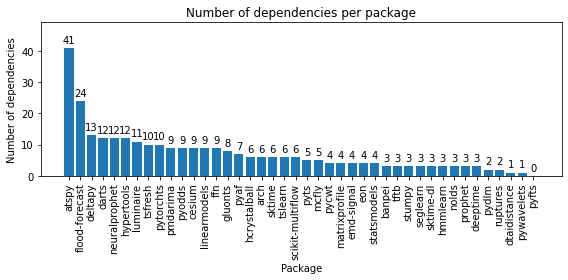

In [12]:
fig, ax = plot_dependencies(dependencies_generic_number)
plt.savefig('../latex/images/nb-dependencies-per-package-generic.pdf')

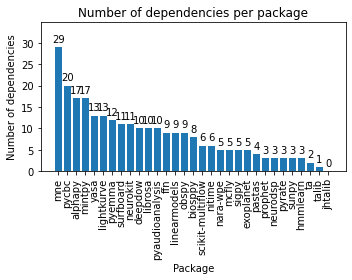

In [13]:
fig, ax = plot_dependencies(dependencies_domain_specific_number, figsize=(5,4))
plt.savefig('../latex/images/nb-dependencies-per-package-domain-specific.pdf')

## Visualization most used dependencies

In [14]:
import networkx as nx

In [15]:
def make_graph(dependencies_graph):
    """Create a nextwork x graph from adjacency dict"""
    nodes = set(list(dependencies_graph.keys()) + [n for neighbors in dependencies_graph.values() for n in neighbors])

    G = nx.DiGraph()
    G.add_nodes_from(nodes)

    for k,v in dependencies_graph.items():
        for n in v:
            G.add_edge(k,n)
    return G

In [16]:
G_domain_specific = make_graph(dependencies_domain_specific_graph)
G_generic = make_graph(dependencies_generic_graph)


dependencies_total_graph = dict()
dependencies_total_graph.update(dependencies_domain_specific_graph)
dependencies_total_graph.update(dependencies_generic_graph)

G_total = make_graph(dependencies_total_graph)

In [22]:
pd.Series(dict(G_generic.in_degree)).nlargest(15)

numpy           37
scipy           30
pandas          23
scikit-learn    21
matplotlib      16
statsmodels      8
tqdm             7
torch            6
numba            6
cython           6
tensorflow       5
seaborn          4
future           4
joblib           4
patsy            3
dtype: int64

In [18]:
pd.Series(dict(G_domain_specific.in_degree)).nlargest(10)

numpy           27
scipy           21
matplotlib      17
pandas          13
scikit-learn    11
tqdm             9
h5py             6
decorator        5
numba            5
astropy          4
dtype: int64

In [19]:
s = pd.Series(dict(G_total.in_degree))
s[s >= 5].sort_values(ascending=False)

numpy           59
scipy           46
pandas          32
matplotlib      31
scikit-learn    28
tqdm            16
numba           11
statsmodels      9
cython           9
seaborn          7
torch            7
requests         7
h5py             7
joblib           7
tensorflow       6
decorator        6
future           5
setuptools       5
six              5
dtype: int64

## Find out whether a package is used as a dependency too

In [23]:
from collections import Counter

In [24]:
packages_used_as_dependencies = pd.DataFrame(
    data=[(p,k) for p in dependencies_generic_graph.keys() for k,v in dependencies_generic_graph.items() if p in v],
    columns=['dependency','used_by']
)

In [25]:
packages_used_as_dependencies

,dependency,used_by
0,gluonts,atspy
1,pmdarima,atspy
2,sktime,sktime-dl
3,statsmodels,arch
4,statsmodels,atspy
5,statsmodels,deltapy
6,statsmodels,linearmodels
7,statsmodels,luminaire
8,statsmodels,pmdarima
9,statsmodels,sktime
